<a href="https://colab.research.google.com/github/ahmed-838/DataSet/blob/main/random_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

url = 'https://raw.githubusercontent.com/ahmed-838/DataSet/main/Cocktail_Juice_Quality_Training_Dataset.csv'
df = pd.read_csv(url)


In [47]:
df.head(10)

,Fruit quality,fixed acidity,citric acid,Percentage of sweeteners,chlorides,Calories,density,pH,sulphates,quality
0,9.4,7.4,0.00,1.9,0.076,72.0,0.9978,3.51,0.56,5
1,9.8,7.8,0.00,2.6,0.098,68.0,0.9968,3.20,0.68,5
2,9.8,7.8,0.04,2.3,0.092,68.0,0.9970,3.26,0.65,5
3,9.8,11.2,0.56,1.9,0.075,57.0,0.9980,3.16,0.58,6
4,9.4,7.4,0.00,1.9,0.076,54.0,0.9978,3.51,0.56,5
5,9.4,7.4,0.00,1.8,0.075,53.0,0.9978,3.51,0.56,5
6,9.4,7.9,0.06,1.6,0.069,52.0,0.9964,3.30,0.46,5
7,10.0,7.3,0.00,1.2,0.065,52.0,0.9946,3.39,0.47,7
8,9.5,7.8,0.02,2.0,0.073,51.0,0.9968,3.36,0.57,7
9,10.5,7.5,0.36,6.1,0.071,51.0,0.9978,3.35,0.80,5


In [48]:
mean_citric_acid = df["citric acid"].mean()
new_df = df['citric acid'].replace(0, mean_citric_acid, inplace=True)
df['Fruit quality'] = df['Fruit quality'].apply(np.round).astype('int32')
print(df)

      Fruit quality  fixed acidity  citric acid  Percentage of sweeteners  \
0                 9            7.4     0.289499                       1.9   
1                10            7.8     0.289499                       2.6   
2                10            7.8     0.040000                       2.3   
3                10           11.2     0.560000                       1.9   
4                 9            7.4     0.289499                       1.9   
...             ...            ...          ...                       ...   
1272             11            5.9     0.289499                       1.9   
1273              9            7.5     0.200000                       2.0   
1274             11            7.8     0.130000                       2.1   
1275             10            8.0     0.220000                       2.3   
1276             12            8.5     0.400000                       6.3   

      chlorides  Calories  density    pH  sulphates  quality  
0         0.

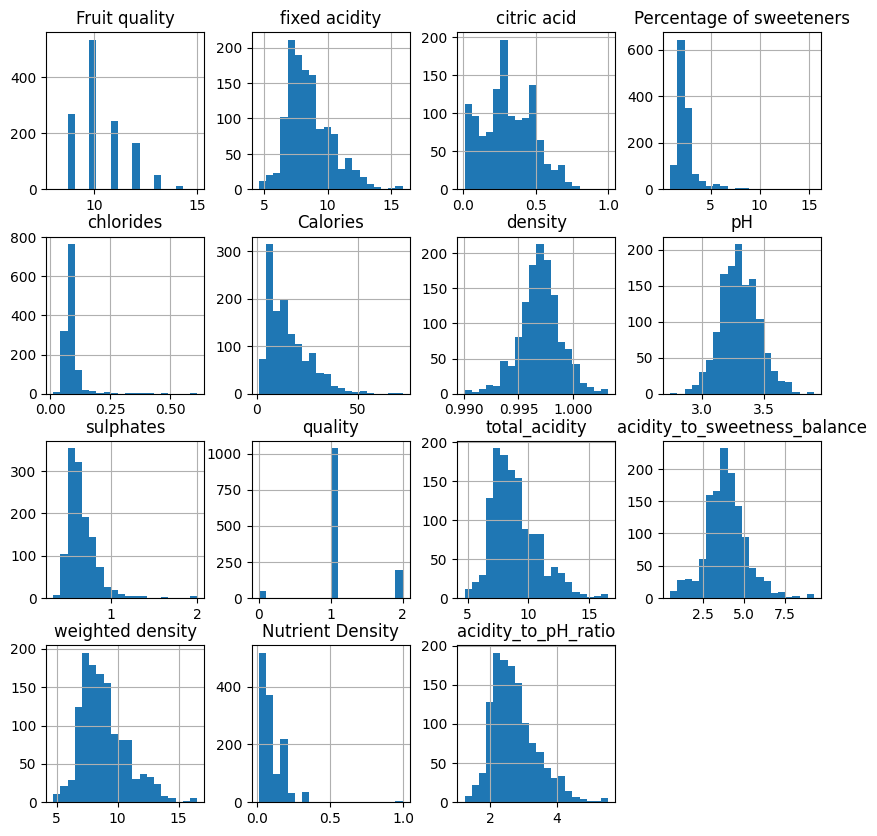

In [55]:
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(10, 10))
plt.show()

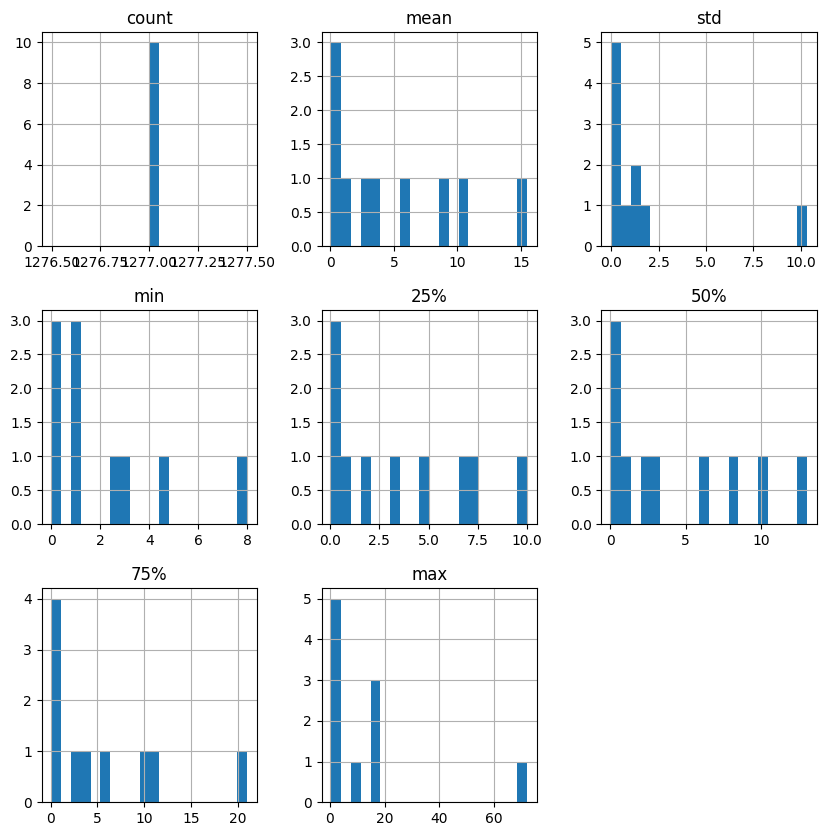

In [50]:
import matplotlib.pyplot as plt
df.describe().T.hist(bins=20, figsize=(10, 10))
plt.show()

In [51]:
df['total_acidity'] = df['fixed acidity'] + df['citric acid']
df['acidity_to_sweetness_balance'] = df['total_acidity'] / df['Percentage of sweeteners']
df['weighted density'] = (df['density']*df['fixed acidity']) + (df['density']*df['citric acid'])  # to be reviewed
df['Nutrient Density'] = df['density'] / df['Calories']
df['acidity_to_pH_ratio'] = df['total_acidity'] / df['pH']

print(df)


def map_quality(value):
    if value <= 4:
        return 'bad'
    elif 5 <= value <= 6:
        return 'normal'
    else:
        return 'excellent'
df['quality'] = df['quality'].apply(map_quality)




def encode_quality(value):
    encoded = {'bad': 0, 'normal': 1, 'excellent': 2}
    return encoded[value]

df['quality'] = df['quality'].apply(encode_quality)


print(df)

      Fruit quality  fixed acidity  citric acid  Percentage of sweeteners  \
0                 9            7.4     0.289499                       1.9   
1                10            7.8     0.289499                       2.6   
2                10            7.8     0.040000                       2.3   
3                10           11.2     0.560000                       1.9   
4                 9            7.4     0.289499                       1.9   
...             ...            ...          ...                       ...   
1272             11            5.9     0.289499                       1.9   
1273              9            7.5     0.200000                       2.0   
1274             11            7.8     0.130000                       2.1   
1275             10            8.0     0.220000                       2.3   
1276             12            8.5     0.400000                       6.3   

      chlorides  Calories  density    pH  sulphates  quality  total_acidity

In [52]:
X = df.iloc[:, [0,1,2,3,4,5,6,7,8,10,11,12,13,14]]
print(X)
Y = df.iloc[:, 9]
print(Y)

      Fruit quality  fixed acidity  citric acid  Percentage of sweeteners  \
0                 9            7.4     0.289499                       1.9   
1                10            7.8     0.289499                       2.6   
2                10            7.8     0.040000                       2.3   
3                10           11.2     0.560000                       1.9   
4                 9            7.4     0.289499                       1.9   
...             ...            ...          ...                       ...   
1272             11            5.9     0.289499                       1.9   
1273              9            7.5     0.200000                       2.0   
1274             11            7.8     0.130000                       2.1   
1275             10            8.0     0.220000                       2.3   
1276             12            8.5     0.400000                       6.3   

      chlorides  Calories  density    pH  sulphates  total_acidity  \
0    

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 150}
Best Accuracy: 0.8579961740793879
Accuracy: 85.15625
Confusion Matrix:
[[  0   5   1]
 [  0 200   4]
 [  0  28  18]]


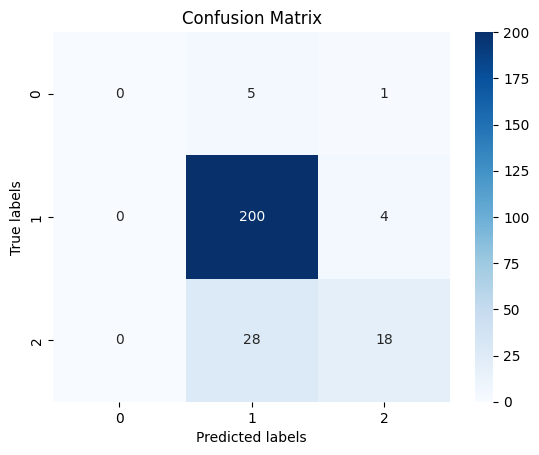

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.86      0.98      0.92       204
           2       0.78      0.39      0.52        46

    accuracy                           0.85       256
   macro avg       0.55      0.46      0.48       256
weighted avg       0.82      0.85      0.82       256



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split a node
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Instantiate a new Random Forest Classifier with the best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Train the model on the training data
best_rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

# Generate confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)

# Plot confusion matrix
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
